# LEARNING FROM DATA – ASSIGNMENT AND LAB – 3

## Task 1

### Simulate data for the classification case (2-dimensional input space, binary target, not fully linearly separable).

This code was produced using ChatGPT.

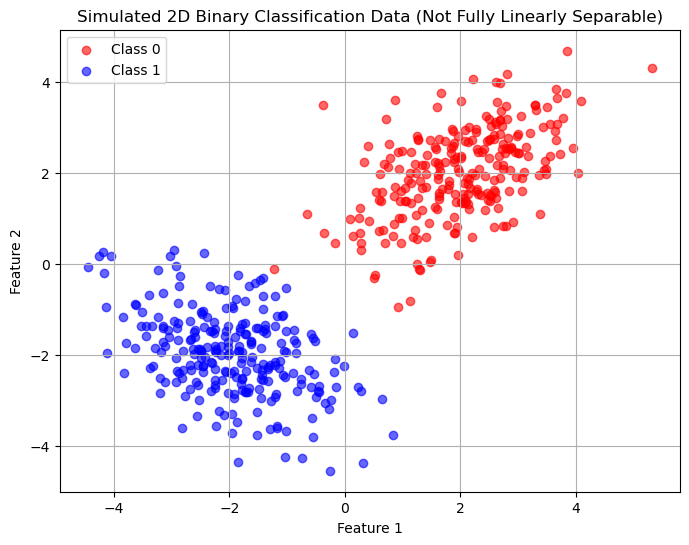

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def generate_non_linear_data(n_samples=500, random_seed=42):
    """
    Generate a 2D binary classification dataset that is not fully linearly separable.
    Class 0 and Class 1 are modeled as 2D Gaussians with overlapping regions.
    
    :param n_samples: Number of samples to generate (default 500)
    :param random_seed: Seed for random number generation (default 42)
    :return: Tuple of features (X) and binary labels (y)
    """
    np.random.seed(random_seed)
    
    # Class 0: Gaussian with mean [2, 2] and some covariance
    mean_class_0 = [2, 2]
    cov_class_0 = [[1, 0.5], [0.5, 1]]  # Some correlation between features
    class_0 = np.random.multivariate_normal(mean_class_0, cov_class_0, n_samples // 2)
    
    # Class 1: Gaussian with mean [-2, -2] and some covariance
    mean_class_1 = [-2, -2]
    cov_class_1 = [[1, -0.5], [-0.5, 1]]  # Some correlation between features
    class_1 = np.random.multivariate_normal(mean_class_1, cov_class_1, n_samples // 2)
    
    # Concatenate both classes to form the dataset
    X = np.vstack((class_0, class_1))
    
    # Labels for each class (0 for class 0, 1 for class 1)
    y = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2))
    
    return X, y

# Generate the data
X, y = generate_non_linear_data(n_samples=500)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.6)
plt.title("Simulated 2D Binary Classification Data (Not Fully Linearly Separable)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


### Split the dataset into 70% training, 10% validation and 20% testing data.

This code was produced using ChatGPT.

In [5]:
from sklearn.model_selection import train_test_split

# First, split the dataset into training (70%) and temporary data (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, split the temporary data into validation (10%) and test (20%)
# Since the temporary data is 30%, we split it into 1/3 for validation and 2/3 for testing, which gives us 10% validation and 20% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Output the shapes of the splits
print("Training set shape:", X_train.shape, "Validation set shape:", X_val.shape, "Test set shape:", X_test.shape)


Training set shape: (350, 2) Validation set shape: (50, 2) Test set shape: (100, 2)


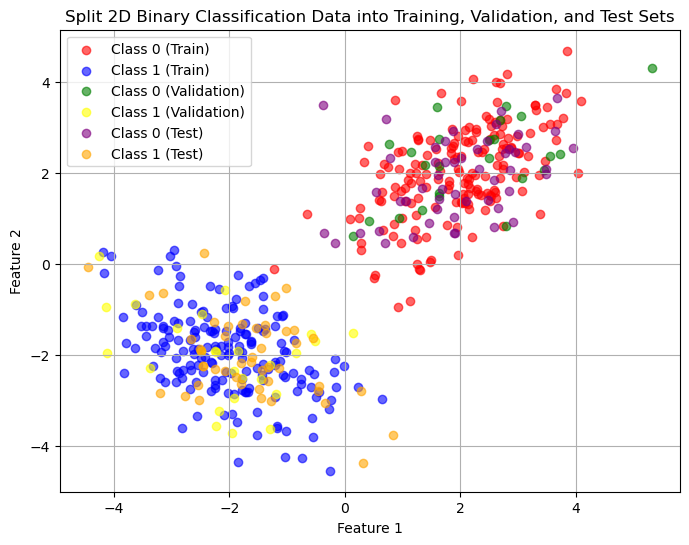

In [6]:
# Optionally, plot the data to visualize the splits
plt.figure(figsize=(8, 6))

# Plot training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0 (Train)', alpha=0.6)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1 (Train)', alpha=0.6)

# Plot validation data
plt.scatter(X_val[y_val == 0, 0], X_val[y_val == 0, 1], color='green', label='Class 0 (Validation)', alpha=0.6)
plt.scatter(X_val[y_val == 1, 0], X_val[y_val == 1, 1], color='yellow', label='Class 1 (Validation)', alpha=0.6)

# Plot test data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='purple', label='Class 0 (Test)', alpha=0.6)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='orange', label='Class 1 (Test)', alpha=0.6)

plt.title("Split 2D Binary Classification Data into Training, Validation, and Test Sets")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### Implement the logistic regression algorithm using gradient descent (discussed in class).

To code this I used the algorithm from the lecture slides. I used the answer code from logisitic regression implementation as a basis for building my code.

I took the gradient algorithm from chat GPT as I was struggling to implement the gradient based on the learning algorithm. I don't really understand how it is the same as what we have.

In [59]:
import math 

def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig


def logisitic_regression(x, y, n_iter=250, eta=0.01):
    """
    Implementation of Logistic Regression algorithm in two dimensional space.
    Weights are initialized with 0s

    :param x: matrix of independent variables (numpy array)
    :param y: corresponding labels
    :param n_iter: number of iterations of gradient descent - default: 250
    :param eta: learning rate - default: 0.01

    :return: final weights (w), history of loss function (loss_history) and history of w0 and w1
    """
    np.random.seed(42)
    w = np.zeros(x.shape[1]).reshape(-1, 1)
    n = x.shape[0]
    w0_history, w1_history, loss_history = [w[0, 0]], [w[1, 0]], []
    
    for _ in range(n_iter):

        ## I got the predictions and gradient from Chat GPT, I don't really understand how they realte to the gradient in the algorithm
        predictions = sigmoid(np.dot(x, w))
        
        # Compute the gradient of the log loss with respect to the weights
        gradient = (1 / n) * np.dot(x.T, (predictions - y.reshape(-1, 1)))
    
        w -= eta*gradient                          
        
        #loss_history.append(calculate_loss(x, y, w)), w0_history.append(w[0, 0]), w1_history.append(w[1, 0])

    return w, loss_history, w0_history, w1_history

### Use the training and validation data to find a suitable learning rate. Once, you picked a learning rate evaluate your model on the test data


In [66]:
 w, loss_history, _, _ = logisitic_regression(X_train, y_train, n_iter=500,)
print(f'The trained weights are: {w}')

The trained weights are: [[-0.91895779]
 [-0.8904443 ]]


## Task 2

### Take the simulated data from the previous task and estimate the unknown parameters for a Gaussian Discriminant Analysis (do not just use build-in functions for GDA)